## Detalle del proyecto y su enfoque.

## Proyecto de Ciencia de Datos: Integración Python + R
* Johana Patricia Pineda de Zamora
* johanapineda@outlook.com

## Tema del proyecto
# Título: “Análisis de Datos de Consumo de Energía en Edificios”

# Objetivo del análisis:
El objetivo principal de este análisis es realizar una exploración, limpieza, transformación y visualización integral del consumo teórico de energía a partir de datos recolectados en tiempo, mediante el uso combinado de Python y R, aprovechando las fortalezas específicas de cada lenguaje en el ciclo de ciencia de datos.


## Requisito fundamentales del desarrollo del proyecto: Ciencia de Datos Integración Python + R.
- Dataset > 1000 filas	 
- Limpieza de datos en Python	
- Análisis y visualización en R	
- Comentarios y explicación de código	
- Integración entre Python y R	
- Entregable con estructura de proyecto en GitHub	

################################################################################################################################
## Justificación de elección de dataset
En aerogeneradores, los sistemas SCADA miden y almacenan datos como la velocidad y la dirección del viento, la potencia generada, etc., en intervalos de 10 minutos. Este archivo se obtuvo del sistema SCADA de un aerogenerador en funcionamiento y generando energía en Turquía.
El dataset cuenta con más de 10,000 registros, variables sobre consumo energético, fecha/hora, temperatura, velocidad del viento, etc.
###################################################################################################################################

## Dataset
Nombre:data/energy_consumption.csv
Formato: CSV, compatible con Python y R.
# Los datos en el archivo son:
* Fecha/Hora (para intervalos de 10 minutos)
* LV ActivePower (kW): La potencia generada por la turbina en ese momento
* Velocidad del viento (m/s): La velocidad del viento a la altura del eje de la turbina (la velocidad del viento que utiliza la turbina para generar electricidad)
* Curva de potencia teórica (KWh): Los valores de potencia teórica que genera la turbina con esa velocidad del viento proporcionada por el fabricante de la turbina.
* Dirección del viento (°): La dirección del viento a la altura del buje de la turbina (las turbinas eólicas giran en esta dirección automáticamente)

################################################################################################################################
## Técnica de la Integración de Python con R.
Este dataset permite de forma natural dividir el flujo de trabajo entre:
# Limpieza inicial con Python (pandas): manejo de nulos, eliminar duplicados, tipos de datos.
# Transferencia a R con rpy2 para transformaciones y análisis con dplyr.

Al ser un archivo .csv plano y estructurado, se convierte fácilmente en el punto de integración entre ambos lenguajes, cumpliendo así con uno de los objetivos fundamentales del proyecto.
#################################################################################################################################

### Desarrollo del proyecto

## Librerías necesarias a instalar en Jupyter

# Instalación de librerías (Python y R)

In [2]:
pip install pandas matplotlib rpy2

  Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached rpy2-3.6.1-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.5-cp313-cp313-win_amd64.whl.metadata (109 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached rpy2_rinterface-3.6.1-cp313-cp313-win_amd64.whl.metadata (2.0 kB)
  Using cached rpy2_robjects-3.6.1-py3-none-any.whl.metadata (3.3 kB)
  Using 

# Librerias R (instalar en consola R)

In [ ]:
install.packages("ggplot2")   # Crear gráficos profesionales (barras, líneas, cajas, dispersión, mapas, etc.).
install.packages("dplyr")    # Filtrar, seleccionar columnas, agrupar, resumir, ordenar datos fácilmente.
install.packages("readr")   # Cargar datasets rápidamente para análisis. Más rápido y limpio que funciones base de R.
install.packages("lubridate") # Extraer año, mes, día, comparar fechas, convertir strings a fechas, operaciones con fechas.

## Cargar y limpiar datos en Python

          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV A

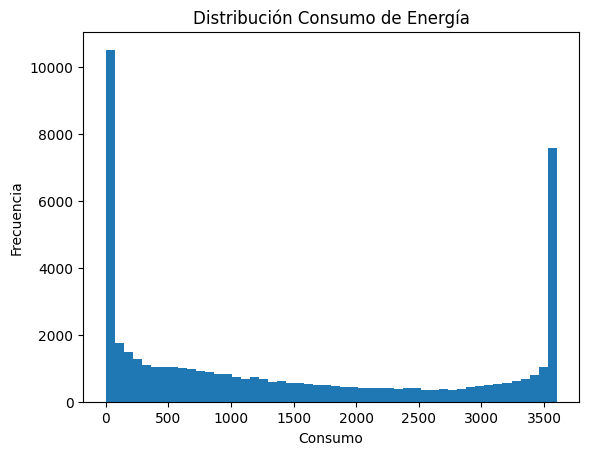

In [4]:
# Importando librerias
import pandas as pd
import matplotlib.pyplot as plt

# Se procede a realizar la Cargar dataset CSV en este bloque de codigo
data = pd.read_csv("energy_consumption.csv")

# Se muestran las primeras filas y un pequeño resumen
print(data.head())
print(data.info())

# Se proceder con una Limpieza inicial de datos base:
# - Eliminar duplicados
data = data.drop_duplicates()

# - Revisar valores nulos
print(data.isnull().sum())

# - Eliminar filas con nulos (si son pocas)
data = data.dropna()

# Convertir columna fecha a datetime
data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')

# En este punto se procede a Guardar archivo limpio para R
data.to_csv("energy_clean.csv", index=False)

# Visualización rápida con matplotlib
plt.hist(data['Theoretical_Power_Curve (KWh)'], bins=50)
plt.title("Distribución Consumo de Energía")
plt.xlabel("Consumo")
plt.ylabel("Frecuencia")
plt.show()

In [3]:
print(data.columns)

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')


## Transferir datos a R y análisis con dplyr y ggplot2

In [1]:
# R. Carga de librerías en R
library(dplyr)
library(ggplot2)
library(readr)  # Para leer archivos CSV de forma eficiente


Adjuntando el paquete: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# R. Carga del archivo limpio generado desde Python
# Leer archivo limpio
energy_data <- read_csv("energy_clean.csv")

# Ver estructura y primeras filas
glimpse(energy_data)
head(energy_data)

Rows: 50530 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl  (4): LV ActivePower (kW), Wind Speed (m/s), Theoretical_Power_Curve (KW...
dttm (1): Date/Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 50,530
Columns: 5
$ `Date/Time`                     <dttm> 2018-01-01 00:00:00, 2018-01-01 00:10…
$ `LV ActivePower (kW)`           <dbl> 380.0478, 453.7692, 306.3766, 419.6459…
$ `Wind Speed (m/s)`              <dbl> 5.311336, 5.672167, 5.216037, 5.659674…
$ `Theoretical_Power_Curve (KWh)` <dbl> 416.3289, 519.9175, 390.9000, 516.1276…
$ `Wind Direction (°)`            <dbl> 259.9949, 268.6411, 272.5648, 271.2581…


Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-01 00:00:00,380.0478,5.311336,416.3289,259.9949
2018-01-01 00:10:00,453.7692,5.672167,519.9175,268.6411
2018-01-01 00:20:00,306.3766,5.216037,390.9000,272.5648
2018-01-01 00:30:00,419.6459,5.659674,516.1276,271.2581
2018-01-01 00:40:00,380.6507,5.577941,491.7030,265.6743
2018-01-01 00:50:00,402.3920,5.604052,499.4364,264.5786


In [ ]:
# R. Validación rápida en R (opcional)
Aunque ya se limpió en Python, siempre se procede a validar desde R para asegurar integridad

In [4]:
# R. Comprobar si hay valores NA
colSums(is.na(energy_data))

# Comprobar duplicados
nrow(energy_data) == nrow(distinct(energy_data))

Date/Time           LV ActivePower (kW) 
                        30544                             0 
             Wind Speed (m/s) Theoretical_Power_Curve (KWh) 
                            0                             0 
           Wind Direction (°) 
                            0

[1] FALSE

In [ ]:
# R. Análisis exploratorio con dplyr + ggplot2
## Agrupación por fecha y promedio de consumo teórico

In [6]:
# R. Agrupar por fecha y calcular promedio de consumo
consumo_diario <- energy_data %>%
  group_by(`Date/Time` = as.Date(`Date/Time`)) %>%
  summarise(promedio_consumo = mean(`Theoretical_Power_Curve (KWh)`, na.rm = TRUE))

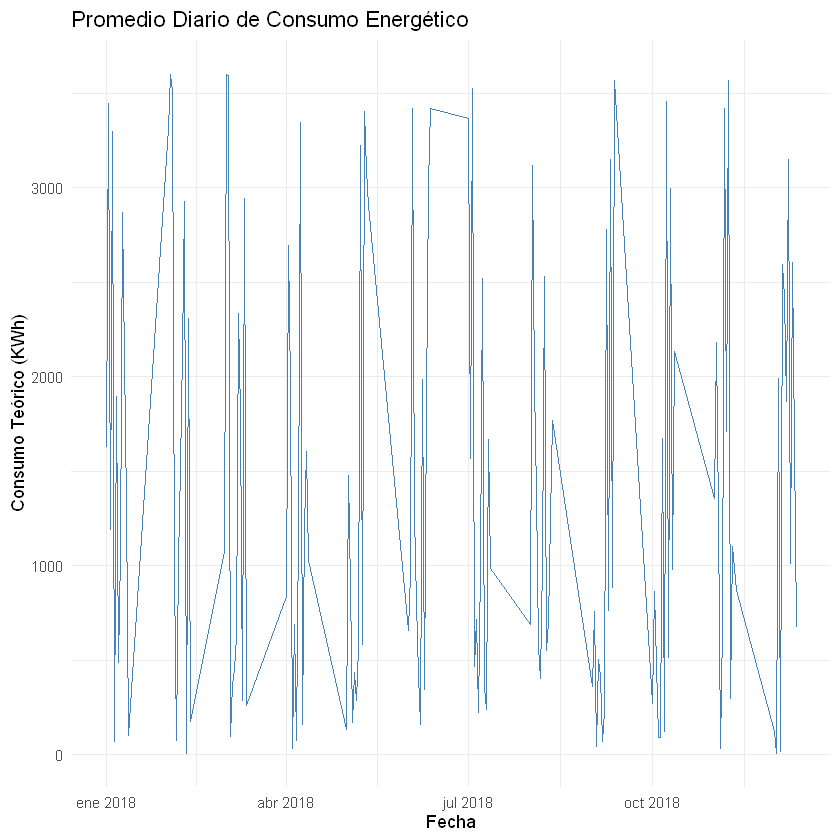

In [8]:
# R. Gráfica de línea del consumo energético
#limpiar las filas con NA para que la grafica considere a todas.
consumo_diario <- consumo_diario %>%
  filter(!is.na(`Date/Time`) & !is.na(promedio_consumo))

# Graficando
ggplot(consumo_diario, aes(x = `Date/Time`, y = promedio_consumo)) +
  geom_line(color = "steelblue") +
  labs(title = "Promedio Diario de Consumo Energético",
       x = "Fecha", y = "Consumo Teórico (KWh)") +
  theme_minimal()

In [ ]:
## Resultados y conclusión
Este bloque realiza la transferencia efectiva de datos desde Python hacia R mediante el archivo energy_clean.csv, y permite:
* Continuar el análisis en R.
* Aplicar transformación de datos con dplyr.
* Visualizar patrones temporales con ggplot2.

## Conclusión de toda la solución del proyecto
El objetivo principal de este análisis fué realizar una exploración, limpieza, transformación y visualización integral del consumo teórico de energía a partir de datos recolectados en tiempo, mediante el uso combinado de Python y R, aprovechando las fortalezas específicas de cada lenguaje en el ciclo de ciencia de datos.
En la primera etapa, implementada en Python, se ejecutó un proceso sistemático de:
* Carga y validación estructural del dataset (energy_consumption.csv),
* Limpieza de datos, eliminando duplicados y valores nulos,
* Conversión de formatos de fecha y
* Exportación de un dataset depurado (energy_clean.csv) como punto de entrada confiable para etapas posteriores.

La segunda etapa, desarrollada en R, tuvo como propósito:
* Importar el dataset limpio,
* Realizar una transformación temporal y estadística con dplyr,
* Generar una visualización significativa con ggplot2 que permita identificar tendencias y patrones de consumo energético a lo largo del tiempo.

Esta estrategia cruzada entre Python y R maximiza la eficiencia analítica, permitiendo una separación clara entre la limpieza estructural de datos (Python) y el análisis visual y descriptivo más avanzado (R), orientado a la toma de decisiones en entornos donde se monitorea el rendimiento energético.